In [1]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install XlsxWriter --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import re
import json
import xlsxwriter

%matplotlib inline

In [3]:
df1 = pd.read_csv('GoogleDataManila.csv')
df2 = pd.read_csv('GoogleDataManilaCar.csv')
df3 = pd.read_csv('GoogleDataProvince.csv')
df4 = pd.read_csv('GoogleDataProvinceCar.csv')

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [4]:
df.isna().sum()

input_id                 0
link                     0
title                    0
category                 4
address                 63
open_hours               0
popular_times            0
website               3898
phone                 1373
plus_code              901
review_count             0
review_rating            0
reviews_per_rating       0
latitude                 0
longitude                0
cid                      0
status                1506
descriptions          5151
reviews_link          1468
thumbnail              141
timezone                 0
price_range           5145
data_id                  0
images                   0
reservations          5153
order_online          4942
menu                     0
owner                    0
complete_address         0
about                 3013
user_reviews          5153
emails                5153
dtype: int64

In [5]:
df.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews,emails
0,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Motech+-+San...,Motech - San Juan,Car repair and maintenance service,"F. Blumentritt, San Juan, Metro Manila","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},NaN,(02) 8866 5053,"J23G+F4 San Juan, Metro Manila",...,0x3397c9d62e63256b:0x5673b6e324346042,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"[{""link"":""https://motechonline.com/content/10-...","{""link"":"""",""source"":""""}","{""id"":""112119085648182131125"",""name"":""Motech -...","{""borough"":"""",""street"":""F. Blumentritt"",""city""...","[{""id"":""payments"",""name"":""Payments"",""options"":...",NaN,NaN
1,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Supreme+Car+...,Supreme Car Care Services Corp.,Auto repair shop,"174 F. Blumentritt, San Perfecto, San Juan, 15...","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},NaN,(02) 8725 9915,"J23F+JH San Juan, Metro Manila",...,0x3397c98f1ed3c4d1:0x271bbe473279bfac,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""104495463787195417138"",""name"":""Supreme ...","{""borough"":""San Perfecto"",""street"":""174 F. Blu...","[{""id"":""from_the_business"",""name"":""From the bu...",NaN,NaN
2,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Velocity+Aut...,Velocity Auto Underchassis Specialist,Auto repair shop,"164, San Juan, 1500 Kalakhang Maynila","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":64,""11"":64,""12"":41,""13"":29,""14...",NaN,(02) 8727 1379,"J26H+94 San Juan, Metro Manila",...,0x3397b62c2834f99d:0x8525fd2dd673154f,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""112539735078705257067"",""name"":""Velocity...","{""borough"":"""",""street"":""164"",""city"":""San Juan""...","[{""id"":""offerings"",""name"":""Offerings"",""options...",NaN,NaN
3,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Kurumaya+Com...,Kurumaya Complete Auto Care - Bonny Serrano,Auto repair shop,"Accross Avida Tower, 290 Col. Bonny Serrano Av...","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},NaN,(02) 8247 2923,"J25W+HW San Juan, Metro Manila",...,0x3397b745751c7f41:0x8cd5c3b5137c724a,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""112191140520019483407"",""name"":""Kurumaya...","{""borough"":"""",""street"":""Accross Avida Tower, 2...","[{""id"":""amenities"",""name"":""Amenities"",""options...",NaN,NaN
4,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/161+Auto+Car...,161 Auto Care Center,Car repair and maintenance service,"J25H+RQH 161 Auto Care Center, N. Domingo, San...",{},{},NaN,(02) 8721 3426,NaN,...,0x3397b62c6e639881:0xe9f5cabf46abd1f4,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""161 Auto Care Center (Owner)""...","{""borough"":"""",""street"":""J25H+RQH, N. Domingo"",...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   input_id            5153 non-null   object 
 1   link                5153 non-null   object 
 2   title               5153 non-null   object 
 3   category            5149 non-null   object 
 4   address             5090 non-null   object 
 5   open_hours          5153 non-null   object 
 6   popular_times       5153 non-null   object 
 7   website             1255 non-null   object 
 8   phone               3780 non-null   object 
 9   plus_code           4252 non-null   object 
 10  review_count        5153 non-null   int64  
 11  review_rating       5153 non-null   float64
 12  reviews_per_rating  5153 non-null   object 
 13  latitude            5153 non-null   float64
 14  longitude           5153 non-null   float64
 15  cid                 5153 non-null   uint64 
 16  status

In [9]:
df.describe()

,review_count,review_rating,latitude,longitude,cid,reservations,user_reviews,emails
count,3297.000000,3297.000000,3297.000000,3297.000000,3.297000e+03,0.0,0.0,0.0
mean,29.298453,3.112527,14.531699,120.925586,1.117794e+19,NaN,NaN,NaN
std,1023.800543,2.175338,0.814486,4.473780,5.039188e+18,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,-93.324994,8.486858e+15,NaN,NaN,NaN
25%,0.000000,0.000000,14.466393,120.992764,7.652171e+18,NaN,NaN,NaN
50%,2.000000,4.300000,14.574556,121.029011,1.214143e+19,NaN,NaN,NaN
75%,7.000000,5.000000,14.650420,121.069460,1.537969e+19,NaN,NaN,NaN
max,58430.000000,5.000000,44.884406,139.809967,1.844595e+19,NaN,NaN,NaN


In [10]:
df = df.drop_duplicates(subset=['title', 'address'])

df.head()

,input_id,link,title,category,address,open_hours,popular_times,website,phone,plus_code,...,data_id,images,reservations,order_online,menu,owner,complete_address,about,user_reviews,emails
0,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Motech+-+San...,Motech - San Juan,Car repair and maintenance service,"F. Blumentritt, San Juan, Metro Manila","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},NaN,(02) 8866 5053,"J23G+F4 San Juan, Metro Manila",...,0x3397c9d62e63256b:0x5673b6e324346042,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"[{""link"":""https://motechonline.com/content/10-...","{""link"":"""",""source"":""""}","{""id"":""112119085648182131125"",""name"":""Motech -...","{""borough"":"""",""street"":""F. Blumentritt"",""city""...","[{""id"":""payments"",""name"":""Payments"",""options"":...",NaN,NaN
1,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Supreme+Car+...,Supreme Car Care Services Corp.,Auto repair shop,"174 F. Blumentritt, San Perfecto, San Juan, 15...","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},NaN,(02) 8725 9915,"J23F+JH San Juan, Metro Manila",...,0x3397c98f1ed3c4d1:0x271bbe473279bfac,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""104495463787195417138"",""name"":""Supreme ...","{""borough"":""San Perfecto"",""street"":""174 F. Blu...","[{""id"":""from_the_business"",""name"":""From the bu...",NaN,NaN
2,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Velocity+Aut...,Velocity Auto Underchassis Specialist,Auto repair shop,"164, San Juan, 1500 Kalakhang Maynila","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":64,""11"":64,""12"":41,""13"":29,""14...",NaN,(02) 8727 1379,"J26H+94 San Juan, Metro Manila",...,0x3397b62c2834f99d:0x8525fd2dd673154f,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""112539735078705257067"",""name"":""Velocity...","{""borough"":"""",""street"":""164"",""city"":""San Juan""...","[{""id"":""offerings"",""name"":""Offerings"",""options...",NaN,NaN
3,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/Kurumaya+Com...,Kurumaya Complete Auto Care - Bonny Serrano,Auto repair shop,"Accross Avida Tower, 290 Col. Bonny Serrano Av...","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...",{},NaN,(02) 8247 2923,"J25W+HW San Juan, Metro Manila",...,0x3397b745751c7f41:0x8cd5c3b5137c724a,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":""112191140520019483407"",""name"":""Kurumaya...","{""borough"":"""",""street"":""Accross Avida Tower, 2...","[{""id"":""amenities"",""name"":""Amenities"",""options...",NaN,NaN
4,357938d2-0a6e-4d28-839e-76094489c591,https://www.google.com/maps/place/161+Auto+Car...,161 Auto Care Center,Car repair and maintenance service,"J25H+RQH 161 Auto Care Center, N. Domingo, San...",{},{},NaN,(02) 8721 3426,NaN,...,0x3397b62c6e639881:0xe9f5cabf46abd1f4,"[{""title"":""All"",""image"":""https://streetviewpix...",NaN,NaN,"{""link"":"""",""source"":""""}","{""id"":"""",""name"":""161 Auto Care Center (Owner)""...","{""borough"":"""",""street"":""J25H+RQH, N. Domingo"",...",NaN,NaN,NaN


In [11]:
df = df.reindex(columns=['title', 'category', 'address', 'plus_code', 'link', 'phone', 'review_count', 'review_rating', 'reviews_per_rating', 'latitude', 'longitude', 'reviews_link', 'complete_address'])

In [12]:
df = df.sort_values(by=['review_count', 'review_rating'], ascending=[False, True])

In [13]:
automotive_repair_services = [
    'Car repair and maintenance service', 'Auto repair shop', 'Tire shop',
    'Auto painting', 'Auto electrical service', 'Auto parts store', 'Car battery store', 'Tuning automobile',
    'Auto parts market', 'Battery wholesaler',
    'Tire repair shop', 'Radiator shop', 'Mechanic',
    'Truck repair shop', 'Auto body shop', 'Auto bodywork mechanic',
    'Car inspection station', 'Auto restoration service',
    'Auto machine shop', 'Repair service',
    'Auto air conditioning service', 'Auto spring shop', 'Auto glass shop',
    'Oil change service', 'ATV repair shop', 'Used auto parts store',
    'Muffler shop',
    'Trailer repair shop',
    'Brake shop', 'Racing car parts store', 'Used tire shop',
    'Electric motor repair shop',
    'Auto radiator repair service', 'Truck parts supplier', 'Auto tune up service',
    'Transmission shop', 'Engine rebuilding service',
    'Radiator repair service', 'Wheel alignment service',
    'Tractor repair shop',
    'Electrical repair shop'
]

df = df[df['category'].isin(automotive_repair_services)]

In [12]:
df = df[~df['title'].str.contains('rapide|mechanigo|gulong|rapidé', case=False, na=False)]

In [13]:
df.describe()

,review_count,review_rating,latitude,longitude
count,3043.000000,3043.000000,3043.000000,3043.000000
mean,7.527769,3.083207,14.529815,120.907211
std,18.885328,2.198340,0.725743,4.642808
min,0.000000,0.000000,0.000000,-93.324994
25%,0.000000,0.000000,14.465500,120.992734
50%,2.000000,4.300000,14.574417,121.028941
75%,6.000000,5.000000,14.650759,121.070470
max,267.000000,5.000000,44.884406,124.260480


In [28]:
df.to_csv('GoogleGaragesMaster.csv', index=False)
dfGarage = df
dfSupply = pd.read_csv('GoogleSupplyMaster.csv')

overlap = dfGarage['title'].isin(dfSupply['title'])

overlap_count = overlap.sum()

print(dfGarage[overlap]['category'].unique())

print(overlap_count)

['Car accessories store' 'Tire shop' 'Auto parts store'
 'Car repair and maintenance service' 'Car battery store'
 'Auto spring shop' 'Auto repair shop' 'Auto body parts supplier'
 'Auto electrical service' 'Motorcycle parts store'
 'Auto air conditioning service' 'Motorcycle repair shop'
 'Alternator supplier' 'Battery wholesaler' 'Auto restoration service'
 'Auto body shop' 'Auto parts market' 'Racing car parts store' 'Mechanic'
 'Transmission shop' 'Truck parts supplier']
374


In [15]:
def parse_json(addr_str):
    try:
        return json.loads(addr_str)  
    except json.JSONDecodeError:
        return {}

df['parsed_address'] = df['complete_address'].apply(parse_json)

In [16]:
locations = ['Batangas', 'Laguna', 'Cavite', 'Rizal', 'Bulacan', 'Mandaluyong', 'Marikina', 'Pasig', 'Quezon City', 'San Juan', 'Caloocan', 'Malabon', 'Navotas', 'Valenzuela', 'Makati', 'Muntinlupa', 'Las Piñas', 'Parañaque', 'Pasay', 'Pateros', 'Taguig']

location_dfs = {}
location_dfs['Manila'] = df[df['parsed_address'].apply(lambda x: 'manila' in x.get('city', '').lower())]

for location in locations:
    location_dfs[location] = df[df['parsed_address'].apply(
        lambda x: location.lower() in (x.get('state', '').lower() or '') or location.lower() in (x.get('city', '').lower() or '')
    )]

Total count: 2992


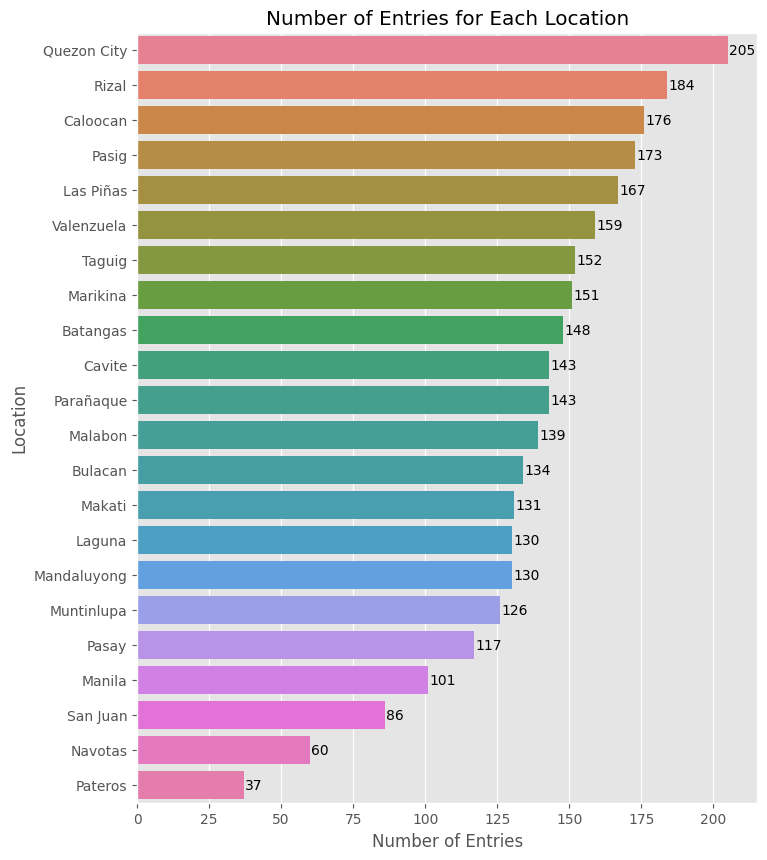

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

location_lengths = {location: len(location_dfs[location]) for location in locations}
location_lengths['Manila'] = len(location_dfs['Manila'])

sorted_location_lengths = dict(sorted(location_lengths.items(), key=lambda x: x[1], reverse=True))

total_count = sum(sorted_location_lengths.values())

plt.style.use('ggplot')
plt.figure(figsize=(8, 10))

palette = sns.color_palette("husl", len(sorted_location_lengths))

ax = sns.barplot(x=list(sorted_location_lengths.values()), 
                 y=list(sorted_location_lengths.keys()), 
                 hue=list(sorted_location_lengths.keys()),
                 palette=palette, 
                 dodge=False, 
                 legend=False)

plt.title('Number of Entries for Each Location')
plt.xlabel('Number of Entries')
plt.ylabel('Location')

for i, value in enumerate(sorted_location_lengths.values()):
    ax.text(value + 0.5, i, str(value), color='black', va='center')

print(f"Total count: {total_count}")

plt.show()


In [21]:
import os

folder_path = os.path.join(os.getcwd(), 'Google')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for location, df_location in location_dfs.items():
    file_name = 'GoogleGarages' + location.replace(' ', '') + '.csv'
    
    file_path = os.path.join(folder_path, file_name)
    
    df_location.to_csv(file_path, index=False)
    
    print(f"Saved {location} to {file_path}")
    
file_path = os.path.join(folder_path, 'GoogleGarages.xlsx')

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    for location, df_location in location_dfs.items():
        sheet_name = 'GoogleGarages' + location.replace(' ', '')
        df_location.to_excel(writer, sheet_name=sheet_name, index=False)

Saved Manila to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesManila.csv
Saved Batangas to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesBatangas.csv
Saved Laguna to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesLaguna.csv
Saved Cavite to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesCavite.csv
Saved Rizal to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesRizal.csv
Saved Bulacan to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesBulacan.csv
Saved Mandaluyong to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesMandaluyong.csv
Saved Marikina to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesMarikina.csv
Saved Pasig to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesPasig.csv
Saved Quezon City to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesQuezonCity.csv
Saved San Juan to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesSanJuan.csv
Saved Caloocan to /home/eron/Notebooks/Cleaner/Google/GoogleGaragesCaloocan.csv
Saved Malabon to /home/eron/Notebooks/Cleaner/Google/Goo